In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split 
from sklearn.svm  import SVR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.linear_model import LogisticRegression as LR 
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import r2_score 
from sklearn import tree 
%matplotlib inline 

/Users/koyuki.nakamori/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('data challenge.csv')

In [3]:
df.head(2)

,ad_network_code,format,type,country,platform,pstday,revenue,clicks,impressions
0,0b0c3dd442e2cf1688d58b1741ce01f182c38bce,static fsi,non-rewarded,Rest of the World,ios,2016-05-10 00:00:00.000000,0.00,45,377.0
1,7a8e69eeedaf9c92d2fff1bbea90147d65a054da,premium interstitial,non-rewarded,Rest of the World,ios,2016-05-24 00:00:00.000000,23.83,682,3629.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96185 entries, 0 to 96184
Data columns (total 9 columns):
ad_network_code    96185 non-null object
format             84899 non-null object
type               96179 non-null object
country            96185 non-null object
platform           96185 non-null object
pstday             96185 non-null object
revenue            95701 non-null float64
clicks             96185 non-null int64
impressions        96075 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 6.6+ MB


In [5]:
df.describe()

,revenue,clicks,impressions
count,95701.000000,96185.000000,96075.000000
mean,5.125966,97.894381,1047.275025
std,24.161685,548.087652,3091.526392
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11.000000
50%,0.130000,3.000000,98.000000
75%,2.240000,32.000000,731.000000
max,1000.386658,24232.000000,52410.000000


In [6]:
df.groupby(['country', 'platform']).sum()

revenue   clicks  impressions
country           platform                                     
Australia         android     4691.858161    13970     442350.0
                  ios        26343.323062   241265    2335000.0
Brazil            android     8931.813070   589561    9404137.0
                  ios         4657.169581   134148    1680722.0
Canada            android     5580.730245    26946     646293.0
                  ios        17197.471617   221559    1714968.0
China             android       10.999299      617      18809.0
                  ios          152.021884     2863      52606.0
Colombia          android       51.512170     3987      86112.0
                  ios           38.456134     2444      18674.0
France            android     9704.559481    91170    2306919.0
                  ios        18868.368096   431126    2893731.0
Germany           android    11228.563286    55109    2125551.0
                  ios        12126.573352   208773    1619098.0
India             android     1223.164523   106590    1302594.0
                  ios          890.414551    38959     401234.0
Italy             android     4075.110107    82545    2104847.0
                  ios         7272.210403   206599    1631920.0
Japan             android       32.789377      179       4764.0
                  ios          233.731115     3569      32442.0
Mexico            android     1994.288891   107534    2390541.0
                  ios         1936.639856    90482     826022.0
Netherlands       android      154.685490     2030      46548.0
                  ios          639.984887    17109     110038.0
Norway            android      504.813598     2763      72017.0
                  ios         1717.129181    50784     260819.0
Philippines       android       12.257405     1400      13429.0
                  ios           81.665496     3205      38334.0
Rest of the World android    23280.821511  2404152   20563818.0
                  ios        33188.319055  1302071    9802564.0
Russia            android     6512.440722   271010    4921434.0
                  ios         6039.876476   281231    2155620.0
Saudi Arabia      android     1770.922999    65517    1237208.0
                  ios         4122.476628   164083    1276382.0
South Korea       android       14.612737      145       6038.0
                  ios          135.286597     2117      24746.0
Spain             android     5443.536094   121741    2579744.0
                  ios         7690.646477   232816    1864125.0
Sweden            android      863.854550     4226     162479.0
                  ios         2470.905842    95370     553084.0
United Kingdom    android    12583.373483    66476    1834893.0
                  ios        36518.249643   442417    3410522.0
United States     android    89905.424785   378629    7211208.0
                  ios       119666.980833   846684    8432564.0

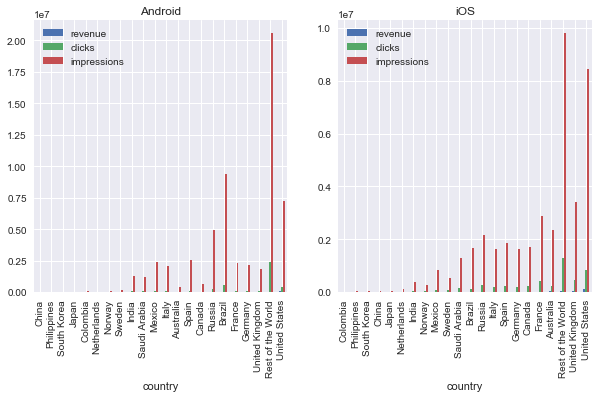

In [7]:
fig, axes = plt.subplots(ncols=2,  figsize=(10, 5))
df[df.platform=='android'].groupby(df.country).sum().sort_values('revenue').plot(kind='bar',ax=axes[0])
df[df.platform=='ios'].groupby(df.country).sum().sort_values('revenue').plot(kind='bar', ax=axes[1])

axes[0].set_title("Android")
axes[1].set_title("iOS")

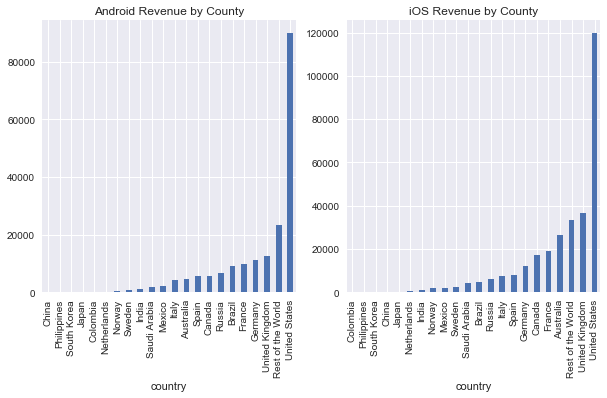

In [8]:
fig, axes = plt.subplots(ncols=2,  figsize=(10, 5))
df[df.platform=='android'].groupby(df.country).sum()['revenue'].sort_values().plot(kind='bar',ax=axes[0])
df[df.platform=='ios'].groupby(df.country).sum()['revenue'].sort_values().plot(kind='bar', ax=axes[1])

axes[0].set_title("Android Revenue by County")
axes[1].set_title("iOS Revenue by County")


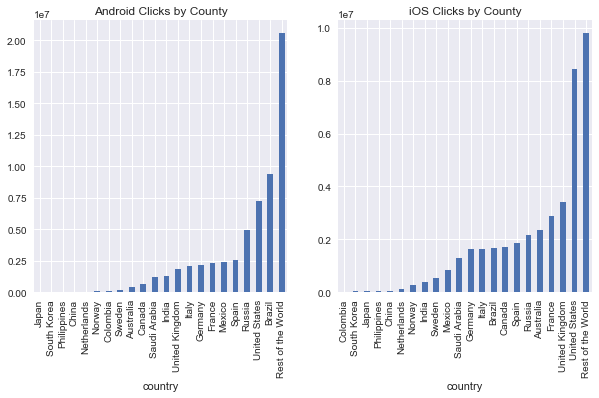

In [24]:
fig, axes = plt.subplots(ncols=2,  figsize=(10, 5))
df[df.platform=='android'].groupby(df.country).sum()['impressions'].sort_values().plot(kind='bar',ax=axes[0])
df[df.platform=='ios'].groupby(df.country).sum()['impressions'].sort_values().plot(kind='bar', ax=axes[1])

axes[0].set_title("Android Impression by County")
axes[1].set_title("iOS Impression by County")


In [27]:
df['rev_per_click']=df.revenue/df.clicks

In [11]:
df['click_per_impression']=df.clicks/df.impressions

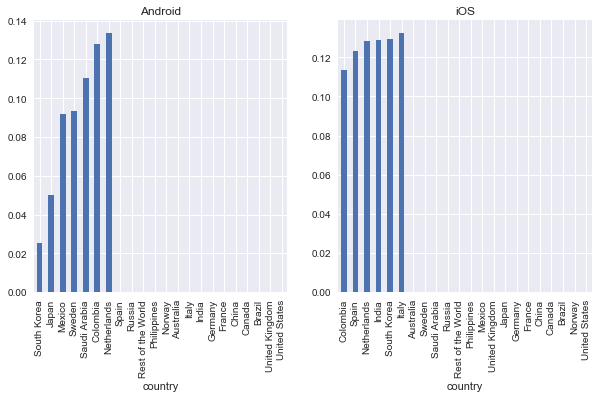

In [25]:
## look at clicks per impression
fig, axes = plt.subplots(ncols=2,  figsize=(10, 5))

df[df.platform=='android'].groupby(df.country).mean()['click_per_impression'].sort_values().plot(kind='bar', ax=axes[0])
df[df.platform=='ios'].groupby(df.country).mean()['click_per_impression'].sort_values().plot(kind='bar', ax=axes[1])

axes[0].set_title("Android")
axes[1].set_title("iOS")

In [53]:
df[df.country=='China'].groupby([df.type, df.format]).sum()

revenue  clicks  impressions  \
type         format                                                 
non-rewarded mid-level 7            2.140000      32       1169.0   
             premium interstitial  36.879784     372       8049.0   
             rich media             0.180000      22        391.0   
             static fsi             2.290000     122       2896.0   
             static/video fsi       1.692331      96       1520.0   
             video fsi              2.808700     541       3832.0   
rewarded     static/video fsi       8.112610       0      10043.0   
             video fsi             56.211655    1086      10020.0   

                                   rev_per_click  click_per_impression  
type         format                                                     
non-rewarded mid-level 7                     inf              9.313068  
             premium interstitial            inf             14.393444  
             rich media                 0.153333             10.640909  
             static fsi                      inf                   inf  
             static/video fsi                inf             17.113660  
             video fsi                       inf                   inf  
rewarded     static/video fsi                inf              0.000000  
             video fsi                       inf            164.393820

In [54]:
df[df.country=='United States'].groupby([df.type, df.format]).sum()

revenue  clicks  impressions  \
type         format                                                     
non-rewarded line item               1291.680000       0      59881.0   
             mid-level 7             3565.810000   19769     357272.0   
             premium interstitial   23849.262212  112258    1779181.0   
             rich media               311.800000    4137      74250.0   
             static fsi               389.460000    9917     112734.0   
             static/video fsi        5575.442655   82403     729167.0   
             video fsi               2278.079386   22348     320730.0   
rewarded     offerwall                  0.000000       0         24.0   
             static/video fsi       14742.209050       0    1783364.0   
             video fsi             120876.284852  590543    7044771.0   

                                   rev_per_click  click_per_impression  
type         format                                                     
non-rewarded line item                       inf              0.000000  
             mid-level 7                     inf             27.842414  
             premium interstitial     122.712633             45.329495  
             rich media                      inf             11.460104  
             static fsi                      inf                   inf  
             static/video fsi                inf             38.470229  
             video fsi                       inf                   inf  
rewarded     offerwall                       NaN              0.000000  
             static/video fsi                inf              0.000000  
             video fsi                       inf            466.433018

In [63]:
#percent of rewarded vs non-rewarded split for US, ios 
df[(df.country=='United States') & (df.platform=='ios')].groupby([df.type]).sum().apply(lambda x:100*x/float(x.sum()))

,revenue,clicks,impressions,rev_per_click,click_per_impression
type,,,,,
non-rewarded,42.628081,50.481998,47.356937,NaN,NaN
rewarded,57.371919,49.518002,52.643063,NaN,0.0


In [64]:
#percent of rewarded vs non-rewarded split for US, andriod  
df[(df.country=='United States') & (df.platform=='android')].groupby([df.type]).sum().apply(lambda x:100*x/float(x.sum()))

,revenue,clicks,impressions,rev_per_click,click_per_impression
type,,,,,
non-rewarded,25.51812,54.762578,39.136425,NaN,NaN
rewarded,74.48188,45.237422,60.863575,NaN,0.0


In [67]:
df[df.country=='United States'].groupby([df.type, df.format]).sum().apply(lambda x:x*100/float(x.sum()))

revenue     clicks  impressions  \
type         format                                                    
non-rewarded line item              0.747154   0.000000     0.488371   
             mid-level 7            2.062592   2.349606     2.913801   
             premium interstitial  13.795267  13.342208    14.510454   
             rich media             0.180356   0.491695     0.605560   
             static fsi             0.225278   1.178666     0.919424   
             static/video fsi       3.225036   9.793849     5.946862   
             video fsi              1.317723   2.656128     2.615775   
rewarded     offerwall              0.000000   0.000000     0.000196   
             static/video fsi       8.527422   0.000000    14.544569   
             video fsi             69.919172  70.187847    57.454988   

                                   rev_per_click  click_per_impression  
type         format                                                     
non-rewarded line item                       NaN                   0.0  
             mid-level 7                     NaN                   0.0  
             premium interstitial            0.0                   0.0  
             rich media                      NaN                   0.0  
             static fsi                      NaN                   NaN  
             static/video fsi                NaN                   0.0  
             video fsi                       NaN                   NaN  
rewarded     offerwall                       NaN                   0.0  
             static/video fsi                NaN                   0.0  
             video fsi                       NaN                   0.0